### Multi Linear Regression

#### Problem Statement
Dataset --> Toyoto_Corolla.csv

Predicting the price of Used Toyoto Corolla Automobile

In [1]:
#Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Toyoto_Corrola.csv")
Dataset.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
#Checking Variance of Cylinder --Because one Single Value
Dataset.Cylinders.var()

0.0

Inference: Dropping Column Id,Model and Cylinders columnas it not Relevent for predicting 

In [4]:
#Dropping Id and Model Column
Dataset = Dataset.drop(["Id","Model","Cylinders"], axis = 1)
Dataset.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [5]:
#Checking NA Values
Dataset.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Gears        0
Weight       0
dtype: int64

Inference: No NA Values Present

## Detecting Collinearity -- Two Methods

#### Correlation Matrix -- 1st Method 

In [6]:
#Using corr()
Dataset.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


#### Scatterplot between variables along with histograms

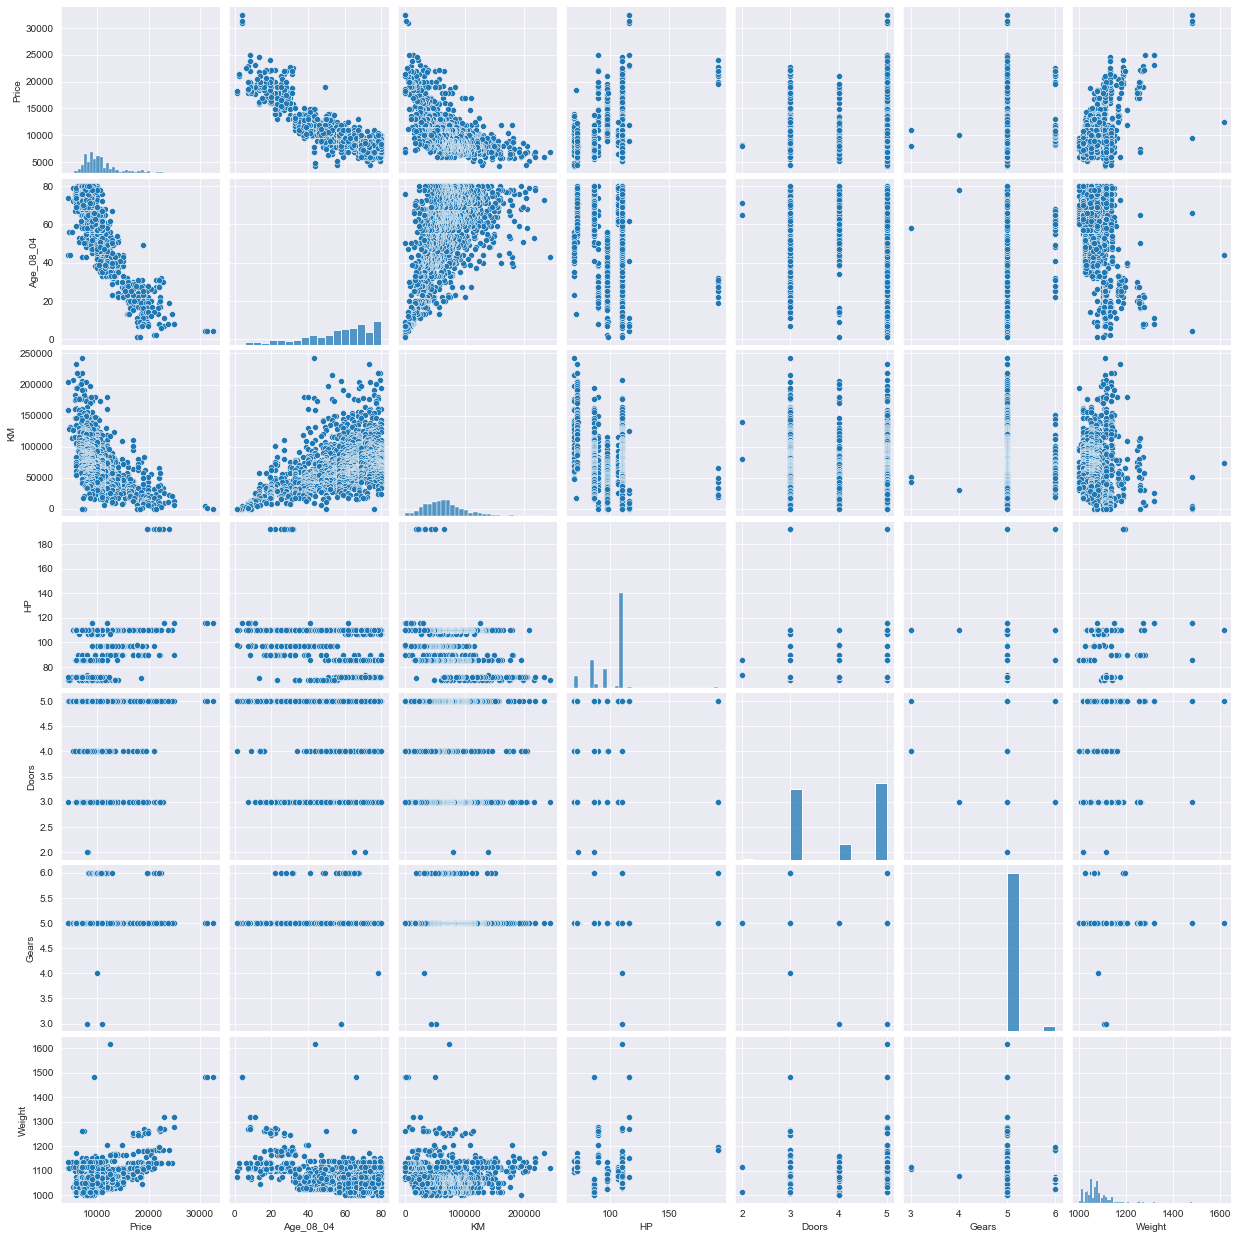

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Dataset)

Inference:

Price & Age_08_04:  -0.87  --> Strong Negative Correlation --> Useful For Model Building

Price & KM: -0.56  --> Medium Negative Correlation --> Useful For Model Building

Price & HP:  0.31 --> Low Positive Correlation --> Useful For Model Building

Price & Doors: 0.18  --> Low Positive Correlation --> Useful For Model Building

Price & Gears: 0.06 --> Low Positive Correlation --> Useful For Model Building

Price & Weight: 0.58 --> Medium Positive Correlation --> Useful For Model Building


#### Preparing a model

In [8]:
#Build the model --1st Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=Dataset).fit()

In [9]:
#Coefficients
model.params

Intercept   -6984.373566
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

Inference: Intercept is B0 = -6984.3, Age_08_04 is B1 = -122.2, KM is B2 = -0.01, HP is B3 = 28.3, Doors is B4 = -9.6, Gears is B5 = 622.2, Weight is B6 = 18.6

In [10]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 P_values is:  
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


#### Hypothesis in MLR

B0 = Beta0 , B1 = Beta1.....B4 = Beta4

H0: B1 = 0, B1--> Slope is Zero Then B1 Variable is not Useful in Predicting

H1: B1 ≠ 0, B1--> Slope is not Zero B1 Variable is  Useful in Predicting

(Like This for All Four Betas)

In [11]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(Age_08_04) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(KM) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(HP) is Insignificant in Predicting")
    
if model.pvalues[4] < α:
    print("p_value is:",model.pvalues[4],", Reject H0,Slope is not Zero and B4(Doors) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[4],", Fail to Reject H0,Slope is Zero and B4(Doors) is Insignificant in Predicting")

if model.pvalues[5] < α:
    print("p_value is:",model.pvalues[5],", Reject H0,Slope is not Zero and B5(Gears) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[5],", Fail to Reject H0,Slope is Zero and B5(Gears) is Insignificant in Predicting")

if model.pvalues[6] < α:
    print("p_value is:",model.pvalues[6],", Reject H0,Slope is not Zero and B5(Weight) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[6],", Fail to Reject H0,Slope is Zero and B5(Weight) is Insignificant in Predicting")

p_value is: 4.387431746843204e-290 , Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting
p_value is: 2.2388996641604514e-56 , Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting
p_value is: 2.2317910307054078e-26 , Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting
p_value is: 0.8087723242942084 , Fail to Reject H0,Slope is Zero and B4(Doors) is Insignificant in Predicting
p_value is: 0.0016539311735242008 , Reject H0,Slope is not Zero and B5(Gears) is Significant in Predicting
p_value is: 7.856457717397872e-96 , Reject H0,Slope is not Zero and B5(Weight) is Significant in Predicting


In [12]:
#1st Model R_square.
(model.rsquared,model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

Inference:R_squared & R_squared_adj is 0.862 which is a good model, but Doors is Insignificant so Dropping Doors and building a New Model

In [13]:
#Dropping Door Column
Toyo1 = Dataset.drop("Doors", axis=1)
Toyo1.head()

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170


In [14]:
#Build the model --2st Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=Dataset).fit()

In [15]:
#Coefficients
model.params

Intercept   -7006.827227
Age_08_04    -122.243676
KM             -0.019996
HP             28.282948
Gears         631.543519
Weight         18.557373
dtype: float64

Inference: Intercept is B0 = -7006.8, Age_08_04 is B1 = -122.2, KM is B2 = -0.01, HP is B3 = 28.3, Gears is B4 = 631.2, Weight is B5 = 18.5

In [16]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept    -5.355584
Age_08_04   -46.745013
KM          -16.550661
HP           10.881794
Gears         3.262043
Weight       23.192000
dtype: float64 
 P_values is:  
 Intercept     9.925271e-08
Age_08_04    2.772608e-290
KM            1.985300e-56
HP            1.496107e-26
Gears         1.132207e-03
Weight       2.904479e-101
dtype: float64


In [17]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(Age_08_04) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(KM) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(HP) is Insignificant in Predicting")

if model.pvalues[4] < α:
    print("p_value is:",model.pvalues[4],", Reject H0,Slope is not Zero and B5(Gears) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[4],", Fail to Reject H0,Slope is Zero and B5(Gears) is Insignificant in Predicting")

if model.pvalues[5] < α:
    print("p_value is:",model.pvalues[5],", Reject H0,Slope is not Zero and B5(Weight) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[5],", Fail to Reject H0,Slope is Zero and B5(Weight) is Insignificant in Predicting")

p_value is: 2.77260828667663e-290 , Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting
p_value is: 1.9853001458813933e-56 , Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting
p_value is: 1.4961068257855788e-26 , Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting
p_value is: 0.0011322073982405166 , Reject H0,Slope is not Zero and B5(Gears) is Significant in Predicting
p_value is: 2.904478910688766e-101 , Reject H0,Slope is not Zero and B5(Weight) is Significant in Predicting


In [18]:
#2st Model R_square.
(model.rsquared,model.rsquared_adj)

(0.8627968258548101, 0.86231709447668)

Inference : R_Squared_adj as increase From Before Model

#### VIF(Variable inflation Factor) -- 2nd Method 

Checking all Y(input) Variable one by one regressing them with Eachother

Industry Standard ≤ 20 for VIF Value

In [19]:
rsq_Age = smf.ols('Age_08_04~KM+HP+Gears+Weight',data=Toyo1).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age_08_04+HP+Gears+Weight',data=Toyo1).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+Gears+Weight',data=Toyo1).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+Weight',data=Toyo1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+Gears',data=Toyo1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Gears','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.874532
1,KM,1.626922
2,HP,1.201213
3,Gears,1.055318
4,Weight,1.405698


Inference:

VIF is less Then 20 For All Variable , So They are not in Collinearity Effect.

## Model Validation Techniques -- 3 Technique

#### Test for Normality of Residuals (Q-Q Plot) -- 1st Technique

Datapoints must be inside Solid red Line or inside the 95% CI

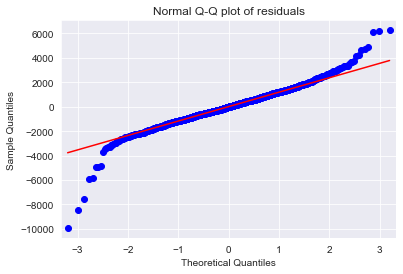

In [20]:
#Building the QQ Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
#Getting a List of Outliers
list(np.where(model.resid>3000))

[array([  16,   52,   62,   74,   91,  109,  110,  111,  115,  125,  141,
         147,  154,  161,  171,  179,  523,  557, 1054, 1058, 1079, 1402],
       dtype=int64)]

Inference: The Given Array is the Outlier if Residual >3000

#### Residual Plot for Homoscedasticity (Fitted VS Residuals, (Ei vsY^) ) --2nd Technique

In [22]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

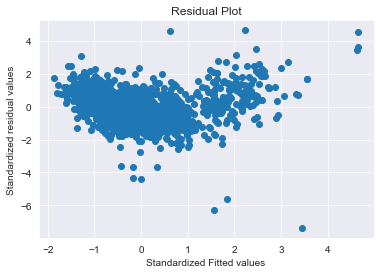

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Inference: No Clear Pattern

#### Residual Vs Regressors -- 3rd Technique (Ei vs Xi)

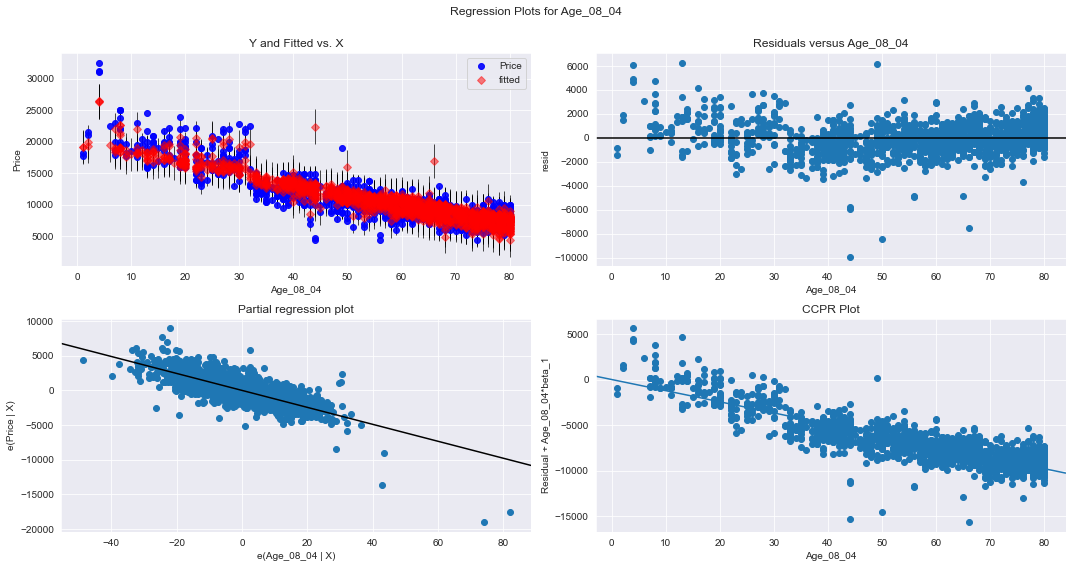

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means Age_08_4 is Significant

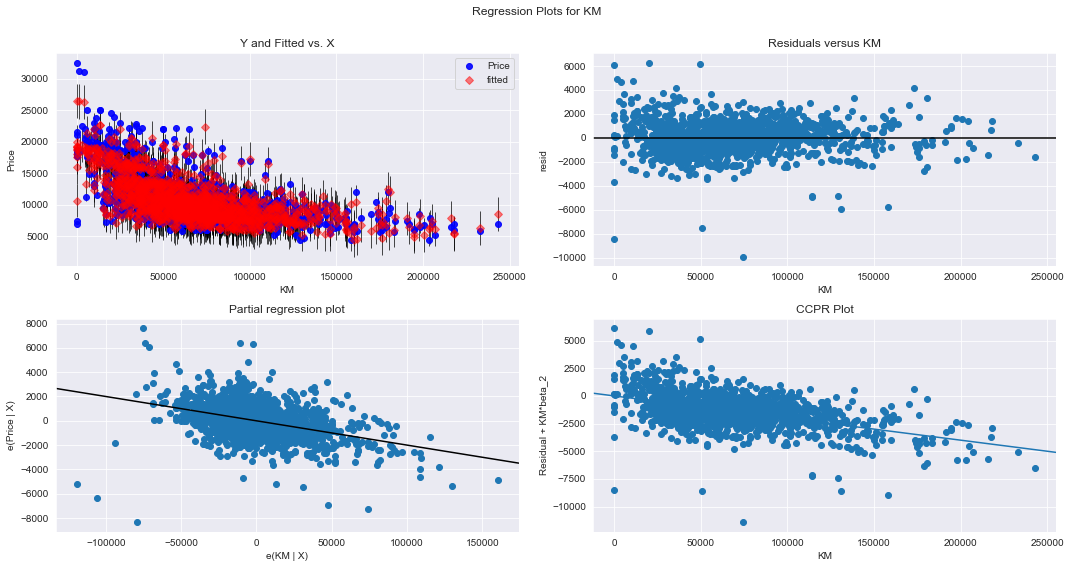

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means KM is Significant

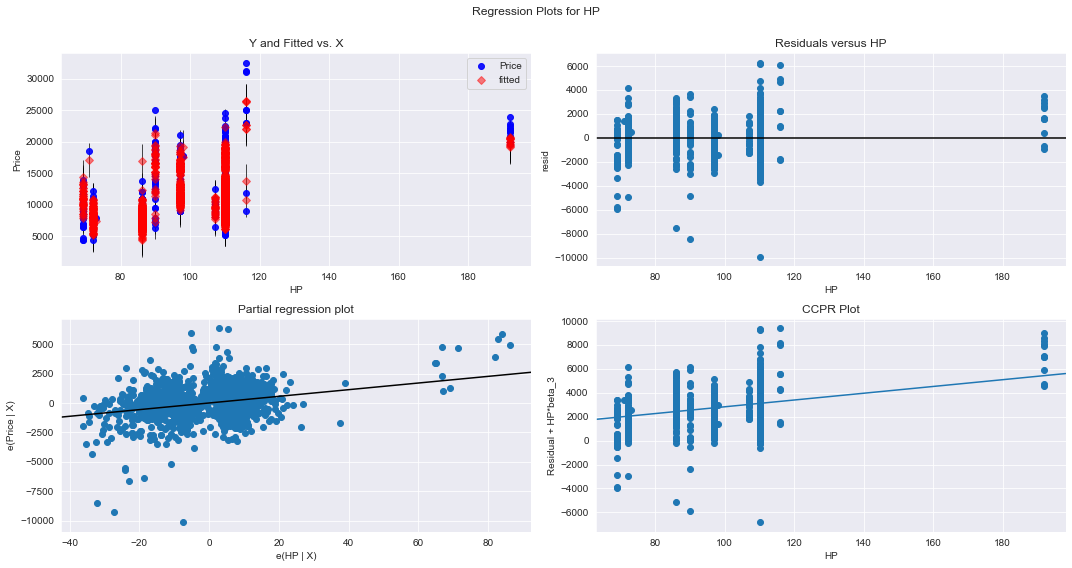

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means HP is Significant

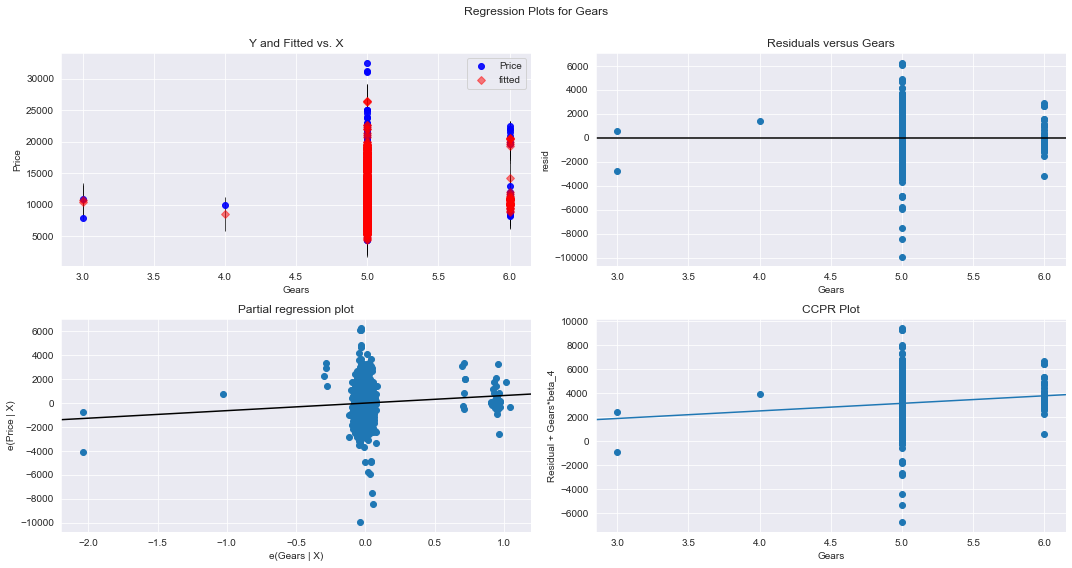

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means Gears is Significant

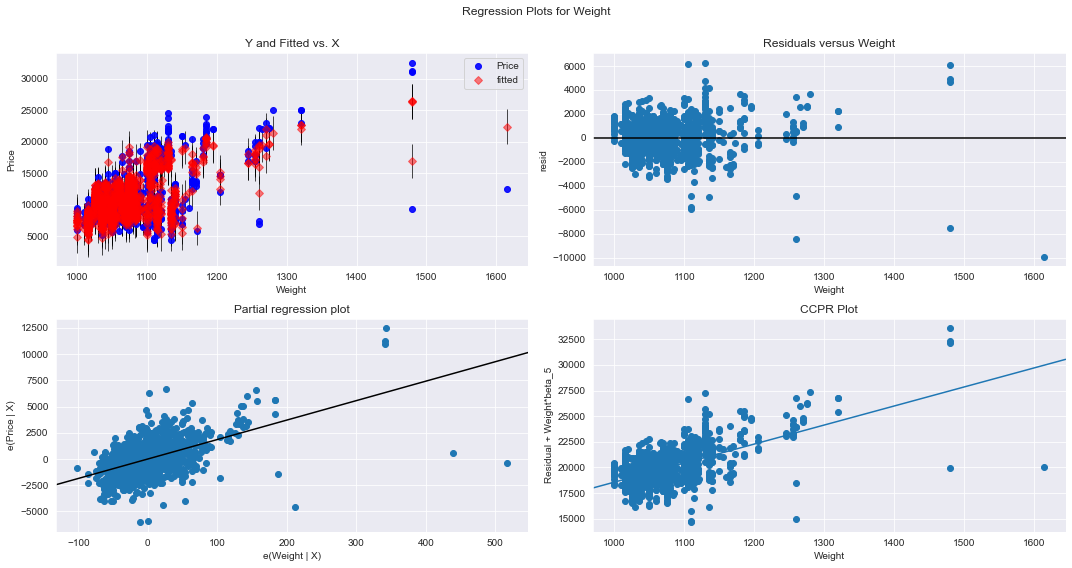

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means Weight is Significant

## Model Deletion Diagnostics-- (Detecting Influencers/Outliers) -- Two Method

#### Cook’s Distance -- 1st Method (First Implementation)

In [29]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]  

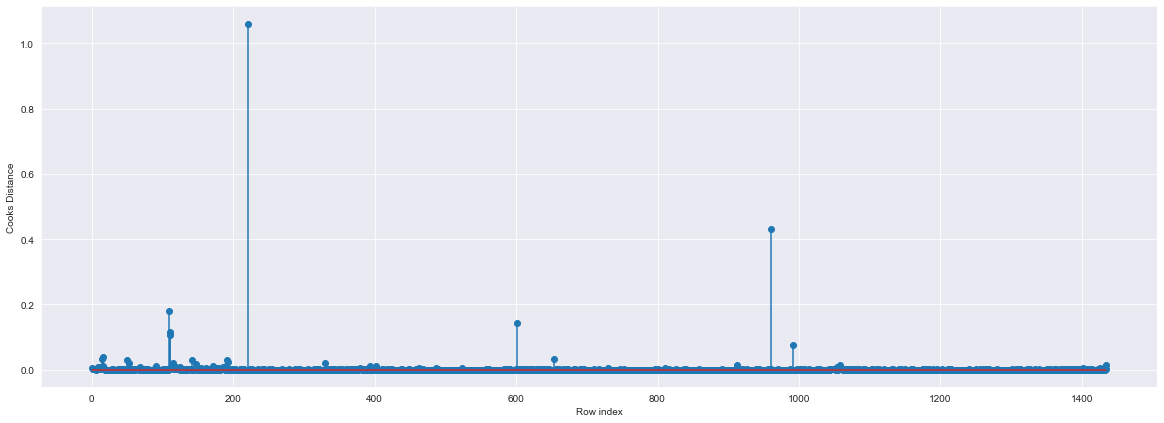

In [30]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyo1)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
#index and value of influencer where c is more than .5
(np.argmax(t),np.max(t))

(221, 1.0607870279718157)

#### High Influence points-- 2nd Method (1st implementation)

After the influnce Points is the outlier

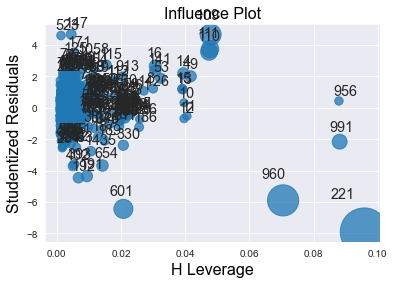

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Toyo1.shape[1]   # K = no of rows
n = Toyo1.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.014623955431754876

Inference: After 0.014 any Datapoint is a outlier, 

#### Comparing the Extreme Observations (Outlier)

In [34]:
# Getting the Values of observation From Cook and Hat Method
Toyo1[Toyo1.index.isin([221,601,960,991,956])]

,Price,Age_08_04,KM,HP,Gears,Weight
221,12450,44,74172,110,5,1615
601,7500,50,1,90,5,1260
956,10950,58,51421,110,3,1105
960,9390,66,50806,86,5,1480
991,7950,58,43000,110,3,1114


In [35]:
#See the differences in HP and other variable values
Toyo1.head()

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170


Inference: As We can see observation are Extreme

#### Improving the model --Deleting the outlier point

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Toyo2=Toyo1.drop(Toyo1.index[[221,601,956,960,991]],axis=0).reset_index()

In [37]:
#Drop the original index
Toyo2=Toyo2.drop(['index'],axis=1)

In [38]:
Toyo2

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170
...,...,...,...,...,...,...
1426,7500,69,20544,86,5,1025
1427,10845,72,19000,86,5,1015
1428,8500,71,17016,86,5,1015
1429,7250,70,16916,86,5,1015


#### Build New Model after 1st Implementation of Cooks Distance And Leverage

In [39]:
#Build the model --3rd Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=Toyo2).fit()

In [40]:
#3rd Model R_square.
(model.rsquared,model.rsquared_adj)

(0.8776737469668932, 0.87724453204397)

#### 2nd Implementation of Cook Distance

In [41]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

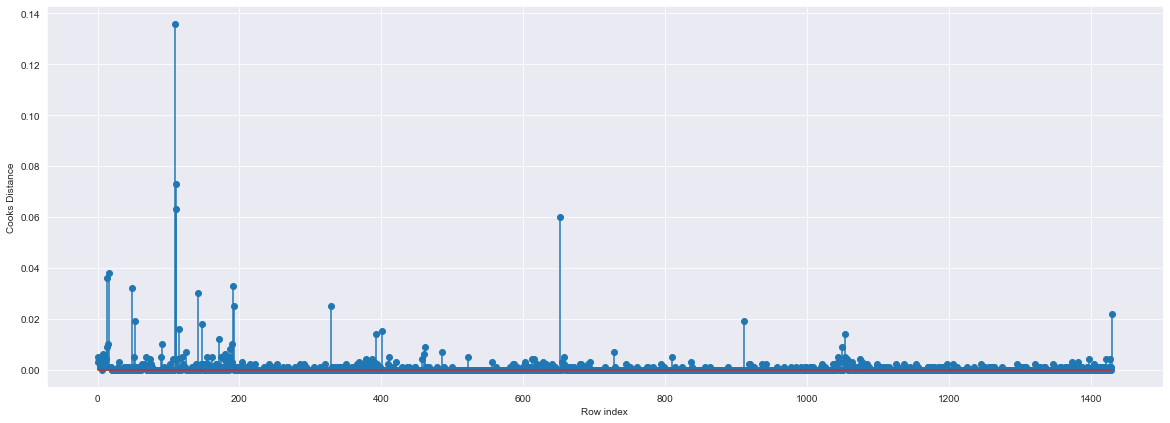

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyo2)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(109, 0.13564581174217194)

Inference: Since the value is <1 , we can stop the diagnostic process and finalize the model, but Just to Confirm We will Create another model and Check R_Squared

#### Improving the model --Deleting the outlier point

In [44]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Toyo3=Toyo2.drop(Toyo2.index[[109]],axis=0).reset_index()

In [45]:
#Drop the original index
Toyo3=Toyo3.drop(['index'],axis=1)
Toyo3

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170
...,...,...,...,...,...,...
1425,7500,69,20544,86,5,1025
1426,10845,72,19000,86,5,1015
1427,8500,71,17016,86,5,1015
1428,7250,70,16916,86,5,1015


#### Build New Model after 2nd Implementation of Cooks Distance

In [46]:
#Build the model --4th Model
import statsmodels.formula.api as smf 
check_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=Toyo3).fit()

In [47]:
#4th Model R_square.
(check_model.rsquared,check_model.rsquared_adj)

(0.875694361087038, 0.8752578946582706)

#### Inference :

#### As the R_Squared For model(0.877) > check_model(0.875), the Final Model is model

In [48]:
#Coefficients
model.params

Intercept   -11246.393358
Age_08_04     -114.169488
KM              -0.022512
HP              26.273848
Gears          507.656888
Weight          23.043257
dtype: float64

Inference: Intercept is B0 = -10521.2, Age_08_04 is B1 = -114.9, KM is B2 = -0.02, HP is B3 = 26.4, Gears is B4 = 515.04, Weight is B5 = 22.3

### Predicting for new data

In [49]:
Toyo2

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170
...,...,...,...,...,...,...
1426,7500,69,20544,86,5,1025
1427,10845,72,19000,86,5,1015
1428,8500,71,17016,86,5,1015
1429,7250,70,16916,86,5,1015


In [50]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':30,"KM":55000,"HP":100,"Gears":5,"Weight":1111},index=[1])
new_data

,Age_08_04,KM,HP,Gears,Weight
1,30,55000,100,5,1111


In [51]:
model.predict(new_data)

1    14857.086116
dtype: float64

Inference: Price Will be 14840.87 for the given new Datapoint

In [52]:
#### Manually  Calculating and Checking the regression equation of the  Final model

# Y = B0 + B1X1 + B2X2 + B3X3 + B4X4 + B5X5

#From Model
# B0 = -10521.2,
# B1 = -114.9, 
# B2 = -0.02, 
# B3 = 26.4, 
# B4 = 515.04, 
# B5 = 22.3

In [53]:
#Calculating the New_data Values Manually

Y = (-10521.2) + (-114.9*30) + (-0.02*55000) + (26.4*100) + (515.04*5) + (22.3*1111)

Y

14922.3

Inference:

Manually Also Its gives the approx the Same results as the Regression equation built by the Model